# Stochastic Gradient Descent

This project is basically building SGD from scratch by learning all basics need to know. Even though we have high level api to do all the functions for us, still it is important to learn few important(if not all) concepts.

Credits: fastai

first thing we need is we need some data. So we are going to generate some data. This data we create should be distributed such that it can be represented by drawing a line through it. 
Consider for example x-axis might represent temperature, y-axis might represent number of ice creams we sell. But we're just going to create some synthetic data that we know is following a line.

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.basics import *
from fastai.vision import *
from fastai.metrics import *

In [0]:
n=100

Because we are not actually going to have a special case of ax + b, instead, we are going to say there's always this second x value which is always 1

<img src="http://latex.codecogs.com/gif.latex?y_i&space;=&space;a_1x_i_,_1&space;&plus;&space;a_2x_i_,_2" title="y_i = a_1x_i_,_1 + a_2x_i_,_2" />

You can see it here, always 1 which allows us just to do a simple matrix vector product.



In [0]:
x=torch.ones(n,2)
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.5817,  1.0000],
        [ 0.5939,  1.0000],
        [-0.2743,  1.0000],
        [-0.7004,  1.0000],
        [ 0.2916,  1.0000]])

we're going to generate this data is by creating some coefficients. a_1 will be 3 and a_2 will be 2. We are going to create a column of numbers for our x's and a whole bunch of 1's.

In [0]:
a=tensor(3.,2);a

tensor([3., 2.])

Now I can do a matrix product of that x by my a, add in some random numbers to add a bit of noise.


In [0]:
y=x@a + torch.rand(n)

Do a scatter plot. just going to plot zero index column against y's.

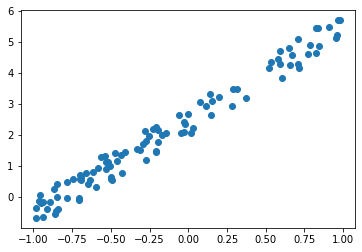

In [0]:
plt.scatter(x[:,0],y)

Now what we're going to do is, we are going to pretend we were given this data and we don't know that the values of our coefficients are 3 and 2. So we're going to pretend that we never knew that and we have to figure them out. 

How would we figure them out? 

How would we draw a line to fit this data?

but...

If we can find a way to find those two parameters to fit that line to those 100 points, we can also fit these arbitrary functions that convert from pixel values to probabilities.


We want to find these parameters such that the line that they create minimizes the error between that line and the points.

So the value of mean squared error is simply the difference between those two (`y_hat-y`) squared. Then we can take the mean because both `y_hat` and `y ` are rank 1 tensors, so we subtract one vector from another vector, it does something called "element-wise arithmetic" in other words, it subtracts each one from each other, so we end up with a vector of differences. Then if we take the square of that, it squares everything in that vector. So then we can take the mean of that to find the average square of the differences between the actuals and the predictions

In [0]:
def mse(y_hat,y):
  return ((y_hat-y)**2).mean()

If you're more comfortable with mathematical notation, the code is just this formula:

<img src="https://latex.codecogs.com/gif.latex?\frac{\sum&space;(\hat{y}-y)^2}{n}" title="\frac{\sum (\hat{y}-y)^2}{n}" />

mse is a loss function. This is something that tells us how good our line is. 

Now we have to come up with what is the line that fits through here. Remember, we are going to pretend we don't know. So what you actually have to do is you have to guess. You actually have to come up with a guess what are the values of a1 and a2. 

So let's say we guess that a1 and a2 are -1 and 1.

In [0]:
a=tensor(-1.,1)

In [0]:
y_hat=x@a
mse(y_hat,y)

tensor(6.5725)

So we can now plot a scatter plot of `x` against `y` and we can plot the scatter plot of `x` against `y_hat`.

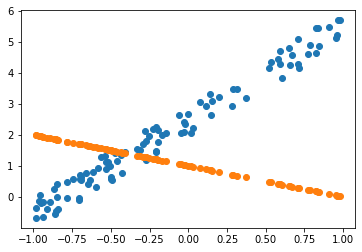

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

You don't actually have to guess the value and move it up and down, and round about. You can actually calculate the derivative. The derivative is the thing that tells you would moving it up or down make it better, or would rotating it this way or that way make it better. 

The gradient or the derivative tells you how changing a1 up or down would change our MSE, how changing a2 up or down would change our MSE, and this does it more quickly than actually moving it up and down


we're doing to call `.backward()`. On our computer, that will calculate the gradient for us.

We're going to loop through 100 times, and we're going to call a function called `update`. That function is going to:

- Calculate `y_hat` (i.e. our prediction)

- Calculate loss (i.e. our mean squared error)

- From time to time, it will print that out so we can see how we're going

- Calculate the gradient. In PyTorch, calculating the gradient is done by using a method called `backward`. Mean squared error was just a simple standard mathematical function. PyTorch keeps track of how it was calculated and lets us calculate the derivative. So if you do a mathematical operation on a tensor in PyTorch, you can call `backward` to calculate the derivative and the derivative gets stuck inside an attribute called `.grad`. 

- Take coefficients and I'm going to subtract from them gradient (`sub_`). There is an underscore there because that's going to do it in-place. It's going to actually update those coefficients `a` to subtract the gradients from them. 

Why do we subtract? Because the gradient tells us if I move the whole thing downwards, the loss goes up. If I move the whole thing upwards, the loss goes down. So I want to do the opposite of the thing that makes it go up. We want our loss to be small. That's why we subtract.

- `lr` is our learning rate. All it is is the thing that we multiply by the gradient.

In [0]:
a=nn.Parameter(a);a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [0]:
lr=1e-1
for t in range(100): update()

tensor(6.5725, grad_fn=<MeanBackward0>)
tensor(1.5861, grad_fn=<MeanBackward0>)
tensor(0.4512, grad_fn=<MeanBackward0>)
tensor(0.1757, grad_fn=<MeanBackward0>)
tensor(0.1086, grad_fn=<MeanBackward0>)
tensor(0.0923, grad_fn=<MeanBackward0>)
tensor(0.0883, grad_fn=<MeanBackward0>)
tensor(0.0873, grad_fn=<MeanBackward0>)
tensor(0.0871, grad_fn=<MeanBackward0>)
tensor(0.0870, grad_fn=<MeanBackward0>)


If we run `update` 100 times printing out the loss from time to time, you can see it starts at  8.9, and it goes down

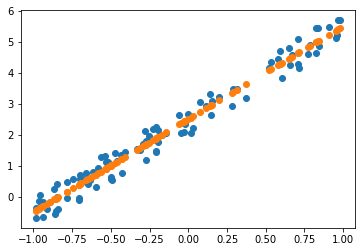

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],(x@a).detach().numpy());

That's it! Believe it or not, that's gradient descent.

# Animation

You can take any plot and turn it into an animation. So you can now actually see it updating each step

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [0]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], (x@a).detach().numpy())
plt.close()

def animate(i):
    update()
    line.set_ydata((x@a).detach().numpy())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=60)

The only difference between stochastic gradient descent and this is something called _mini-batches_.

what we did here was we calculated the value of the loss on the whole dataset on every iteration. But if your dataset is 1.5 million images in ImageNet, that's going to be really slow. Just to do a single update of your parameters, you've got to calculate the loss on 1.5 million images. You wouldn't want to do that. So what we do is we grab 64 images or so at a time at random, and we calculate the loss on those 64 images, and we update our weights. Then we have another 64 random images, and we update our weights. In other words, the loop basically looks exactly the same but add some random indexes on our `x` and `y` to do a mini-batch at a time, and that would be the basic difference.

So that would mean that in update function we defined earlier x would be __x[rand_idx]__ and y would become __y[rand_idx]__.


Once you add those grab a random few points each time, those random few points are called your mini-batch, and that approach is called SGD or Stochastic Gradient Descent.

# SGD with Neural network

Now its time to learn more about sgd
Get the 'pickled' MNIST dataset from http://deeplearning.net/data/mnist/mnist.pkl.gz. We're going to treat it as a standard flat dataset with fully connected layers, rather than using a CNN

In [0]:
!mkdir /content/data/mnist

In [0]:
!wget http://deeplearning.net/data/mnist/mnist.pkl.gz
!mv mnist.pkl.gz /content/data/mnist
!ls /content/data/mnist/

--2020-05-07 13:15:05--  http://deeplearning.net/data/mnist/mnist.pkl.gz
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16168813 (15M) [application/x-gzip]
Saving to: ‘mnist.pkl.gz’

mnist.pkl.gz        100%[===================>]  15.42M  4.17MB/s    in 4.6s    

2020-05-07 13:15:11 (3.36 MB/s) - ‘mnist.pkl.gz’ saved [16168813/16168813]

mnist.pkl.gz


In [0]:
path = Config().data_path()/'mnist'

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/mnist/mnist.pkl.gz')]

In [0]:
with gzip.open(path/'mnist.pkl.gz','rb') as f:
  ((x_train,y_train),(x_valid,y_valid),_) = pickle.load(f,encoding='latin-1')

(50000, 784)

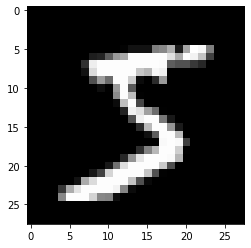

In [0]:
plt.imshow(x_train[0].reshape((28,28)),cmap='gray')
x_train.shape

Currently they are numpy arrays so need them to be tensors. So I can just map torch.tensor across all of them, and so now they're tensors.

In [0]:
x_train,y_train,x_valid,y_valid = map(torch.tensor,(x_train,y_train,x_valid,y_valid))
n,c=x_train.shape
x_train.shape, y_train.min(), y_train.max()

(torch.Size([50000, 784]), tensor(0), tensor(9))

Convert tensor to pytorch dataset so that we can access like x[0] format. And then create databunch, which takes dataset as input and create dataloader for us

In [0]:
bs=64
train_ds = TensorDataset(x_train,y_train)
valid_ds = TensorDataset(x_valid, y_valid)
data = DataBunch.create(train_ds,valid_ds,bs=bs)

In [0]:
x,y=next(iter(data.train_dl))
x.shape, y.shape

(torch.Size([64, 784]), torch.Size([64]))

Rather than do this y_hat = x@a thing, we're going to create an nn.Module. If you want to create an nn.Module that does something different to what's already out there, you have to subclass it. 
So the only thing we want to add is we want to create an attribute in our class which contains a linear layer an nn.Linear module.

In [0]:
class Mnist_Logistic(nn.Module):
  def __init__(self):
    super().__init__()
    self.lin=nn.Linear(784,10,bias=True)
  
  def forward(self, xb): return self.lin(xb)

In [0]:
model=Mnist_Logistic().cuda()

In [0]:
model

Mnist_Logistic(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)

In [0]:
model.lin

Linear(in_features=784, out_features=10, bias=True)

In [0]:
[p.shape for p in model.parameters()]

[torch.Size([10, 784]), torch.Size([10])]

In [0]:
lr=2e-2

In [0]:
loss_func = nn.CrossEntropyLoss()

In [0]:
def update(x,y,lr):
  wd = 1e-5
  y_hat = model(x)
  w2 = 0.
  for p in model.parameters(): w2 += (p**2).sum()

  loss=loss_func(y_hat,y) + w2*wd
  loss.backward()
  with torch.no_grad():
    for p in model.parameters():
      p.sub_(lr*p.grad)
      p.grad.zero_()
  return loss.item()

In [0]:
losses = [update(x,y,lr) for x,y in data.train_dl]

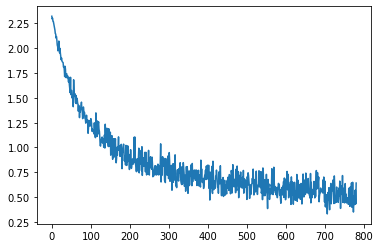

In [0]:
plt.plot(losses);

In [0]:
class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784, 50, bias=True)
        self.lin2 = nn.Linear(50, 10, bias=True)

    def forward(self, xb):
        x = self.lin1(xb)
        x = F.relu(x)
        return self.lin2(x)

In [0]:
model = Mnist_NN().cuda()

In [0]:
losses = [update(x,y,lr) for x,y in data.train_dl]

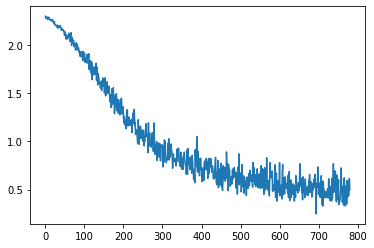

In [0]:
plt.plot(losses);

In [0]:
model = Mnist_NN().cuda()

In [0]:
def update(x,y,lr):
  opt=optim.SGD(model.parameters(),lr)
  y_hat=model(x)
  loss = loss_func(y_hat,y)
  loss.backward()
  opt.step()
  opt.zero_grad()
  return loss.item()

In [0]:
losses=[update(x,y,lr) for x,y in data.train_dl]

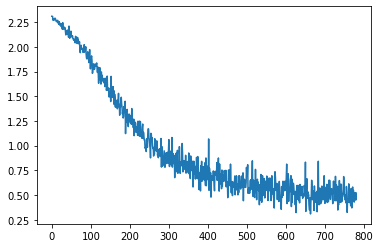

In [0]:
plt.plot(losses);